<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorios N°06

<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1iLbdUKIrQByZ_yJFKOonV2VK4UL1aMvA" width = "400" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [3]:
data['dataset'].value_counts()

I      11
II     11
III    11
IV     11
Name: dataset, dtype: int64

Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.

In [4]:
# Dividir los datos en cuatro conjuntos según el valor de "dataset"
ds1 = data[data['dataset'] == 'I']
ds2 = data[data['dataset'] == 'II']
ds3 = data[data['dataset'] == 'III']
ds4 = data[data['dataset'] == 'IV']

Graficos:



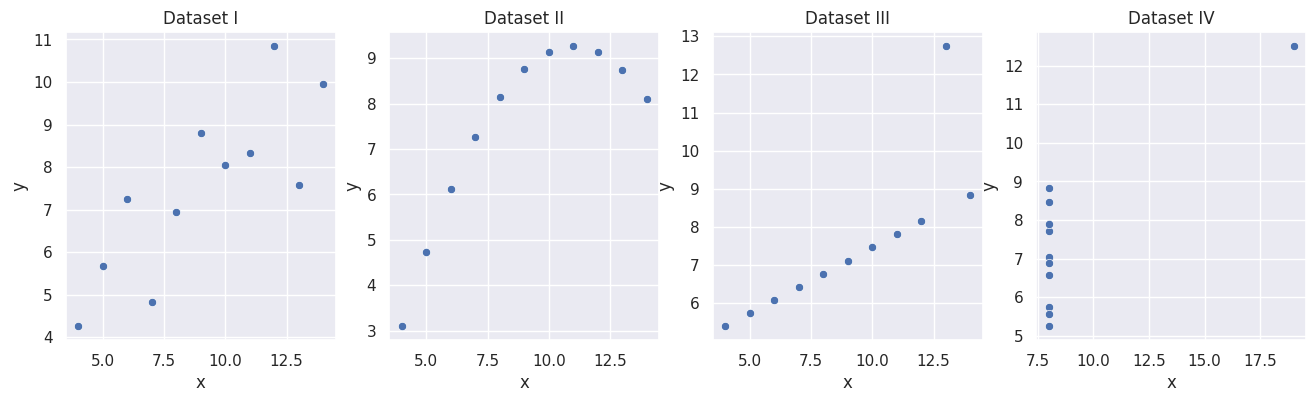

In [5]:
print("Graficos:\n")

# Crear una figura con cuatro subplots
fig, axs = plt.subplots(ncols=4, figsize=(16, 4))

# Graficar cada conjunto de datos en su respectivo subplot
sns.scatterplot(x='x', y='y', data=ds1, ax=axs[0])
sns.scatterplot(x='x', y='y', data=ds2, ax=axs[1])
sns.scatterplot(x='x', y='y', data=ds3, ax=axs[2])
sns.scatterplot(x='x', y='y', data=ds4, ax=axs[3])

# Agregar títulos a los subplots
axs[0].set_title('Dataset I')
axs[1].set_title('Dataset II')
axs[2].set_title('Dataset III')
axs[3].set_title('Dataset IV')

# Mostrar el gráfico
plt.show()

**Respuesta:** Los grupos se ven distintos entre sí.

- El grupo uno parece un conjunto más disperso, pero a simple vista se observa una tendencia lineal.

- El segundo grupo parece ajustarse a un modelo cuadrático.

- El tercer grupo se ve clara una tendencia lineal, pero el penúltimo dato corresponde a un outlier que eliminaremos para el ajuste.

- Y, por último, en el cuarto grupo se observa un dato outlier que despreciaremos y, lo más destacable, que los ejes están rotados. Para un mismo x se observan varias imagenes. Por ende, en este caso, x está en función de y (no al revés como se presenta).

2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando `describe` para cada grupo. Interprete.

In [6]:
# Función para que las tablas con estadísticas se impriman una al lado de otra (y no todas hacia abajo):
from IPython.display import display_html
def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
        html_str += '&nbsp;&nbsp;&nbsp;&nbsp;'
    display_html(
        html_str.replace('table','table style="display:inline"'),
        raw=True
    )

# Estadísticas para cada grupo:
print("Estadisticas Basicas:\n")
x=" "
print(f"{10*x}Dataset I {20*x}Dataset II {19*x}Dataset III {18*x}Dataset IV")
display_side_by_side(ds1.describe(),ds2.describe(),ds3.describe(),ds4.describe())

Estadisticas Basicas:

          Dataset I                     Dataset II                    Dataset III                   Dataset IV


,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000
,x,y
count,11.000000,11.000000


**Respuesta:** Se observa que prácticamente los dataset presentan el mismo comportamiento estadístico. Sin embargo, ya vimos gráficamente que los datos son muy distintos entre sí. Entonces, de esto podemos concluir que los datos estadísticos básicos (como la media, la varianza, etc) que presenta la función `describe` no son un análisis suficiente para decidir qué modelo se ajusta mejor a los datos.

3. Realice un ajuste lineal (con **sklearn**) y calcule los resultados de las métricas para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.

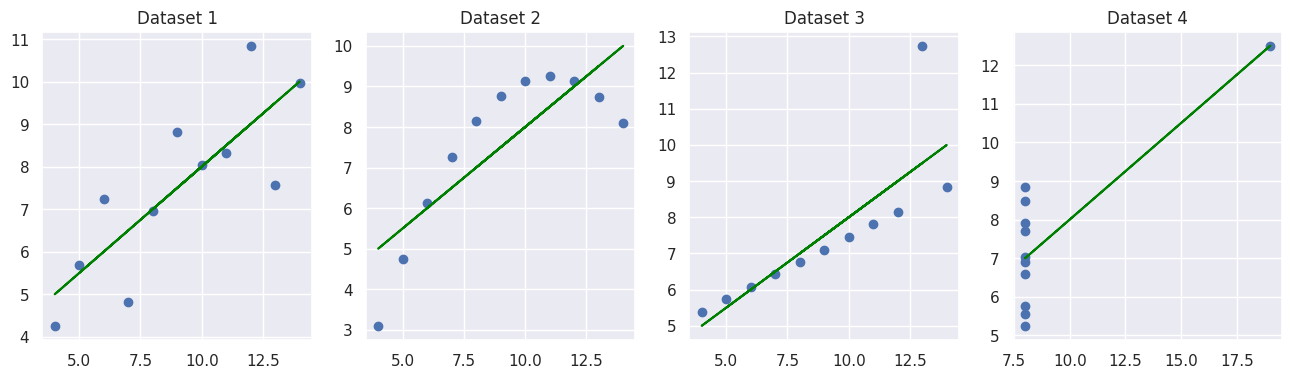

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

In [7]:
# Regresión lineal:

datasets = [ds1, ds2, ds3, ds4]
metrics_dict = {}
fig, axs = plt.subplots(ncols=4, figsize=(16, 4))
i = 0
for ds in datasets:

  X = ds[['x']]
  y = ds['y']

  # Ajustar el modelo:
  model = LinearRegression()  # Creando el modelo.
  model.fit(X, y)             # Ajustando el modelo.

  # Predicciones:
  y_hat = model.predict(X)

  # Métricas:

  metrics = {}
  metrics['rmse'] = [round(np.sqrt(mean_squared_error(y, y_hat)), 4)]
  metrics['r2'] = [round(r2_score(y, y_hat), 4)]

  metrics_dict[i] = metrics

  # Visualizar resultados
  fig = plt.figure(figsize=(4, 4))
  axs[i].scatter(X, y)
  axs[i].plot(X, y_hat, color = 'green');
  axs[i].set_title(f'Dataset {i+1}')
  i += 1


plt.tight_layout()
plt.show()

In [8]:
# Mostrar métricas:

for i in range(0,4):
  ds_metric = pd.DataFrame(metrics_dict[i])
  print(f'Dataset {i+1}:')
  display(ds_metric)
  print('\n\n')


Dataset 1:


,rmse,r2
0,1.1185,0.6665





Dataset 2:


,rmse,r2
0,1.1191,0.6662





Dataset 3:


,rmse,r2
0,1.1183,0.6663





Dataset 4:


,rmse,r2
0,1.1177,0.6667


4. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

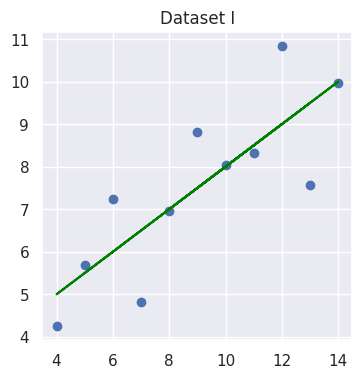

Métricas:


,rmse,r2
0,1.1185,0.6665


In [9]:
# Dataset I: Ajuste lineal

X1 = ds1[['x']]
y1 = ds1['y']

model1 = LinearRegression()  # Creando el modelo.
model1.fit(X1, y1)           # Ajustando el modelo.

# Predicciones:
y_hat1 = model1.predict(X1)

# Visualizar resultados:
plt.figure(figsize=(4,4))
plt.scatter(X1, y1)
plt.plot(X1, y_hat1, color = 'green');
plt.title('Dataset I')
plt.show()

# Métricas:
metric1 = pd.DataFrame()
metric1['rmse'] = [round(np.sqrt(mean_squared_error(y1, y_hat1)), 4)]
metric1['r2'] = [round(r2_score(y1, y_hat1), 4)]
print('Métricas:')
display(metric1)

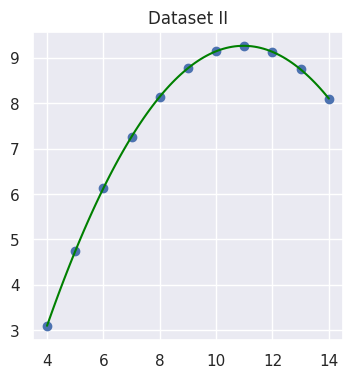

Métricas:


,rmse,r2
0,0.0014,1.0


In [10]:
# Dataset II: Ajuste de un modelo polinomial de grado 2

X2 = ds2['x']
y2 = ds2['y']

# Ajustando el modelo:
coeffs = np.polyfit(X2, y2, 2)
poly = np.poly1d(coeffs)

# Visualizar resultados:
plt.figure(figsize=(4, 4))
plt.scatter(X2, y2)
x = np.linspace(np.min(X2), np.max(X2), 100)
plt.plot(x, poly(x), color = 'green');
plt.title('Dataset II')
plt.show()

# Métricas:
y_hat2 = poly(X2)
metric2 = pd.DataFrame()
metric2['rmse'] = [round(np.sqrt(mean_squared_error(y2, y_hat2)), 4)]
metric2['r2'] = [round(r2_score(y2, y_hat2), 4)]
print('Métricas:')
display(metric2)

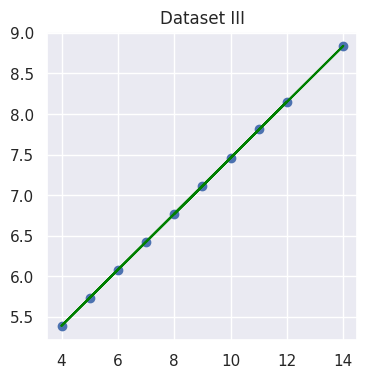

Métricas:


,rmse,r2
0,0.0028,1.0


In [11]:
# Dataset III: Eliminar outlier y ajuste lineal

# Quitar outlier:
ds3_new = ds3[ds3['y'] < 10]

X3 = ds3_new[['x']]
y3 = ds3_new['y']

model3 = LinearRegression()  # Creando el modelo.
model3.fit(X3, y3)           # Ajustando el modelo.

# Predicciones:
y_hat3 = model3.predict(X3)

# Visualizar resultados:
plt.figure(figsize=(4,4))
plt.scatter(X3, y3)
plt.plot(X3, y_hat3, color = 'green');
plt.title('Dataset III')
plt.show()

# Métricas:
metric3 = pd.DataFrame()
metric3['rmse'] = [round(np.sqrt(mean_squared_error(y3, y_hat3)), 4)]
metric3['r2'] = [round(r2_score(y3, y_hat3), 4)]
print('Métricas:')
display(metric3)

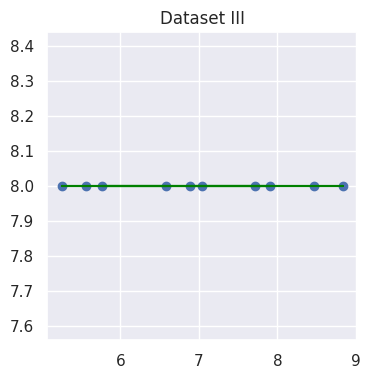

Métricas:


,rmse,r2
0,0.0,1.0


In [15]:
# Dataset IV: Eliminar outlier, rotar ejes y ajuste lineal

# Quitar outlier
ds4_new = ds4[ds4['y'] < 10]

# Cambiar ejes
X4 = ds4_new[['y']]
y4 = ds4_new['x']

model4 = LinearRegression()  # Creando el modelo.
model4.fit(X4, y4)           # Ajustando el modelo.

# Predicciones:
y_hat4 = model4.predict(X4)

# Visualizar resultados:
plt.figure(figsize=(4,4))
plt.scatter(X4, y4)
plt.plot(X4, y_hat4, color = 'green');
plt.title('Dataset III')
plt.show()

# Métricas:
metric4 = pd.DataFrame()
metric4['rmse'] = [round(np.sqrt(mean_squared_error(y4, y_hat4)), 4)]
metric4['r2'] = [round(r2_score(y4, y_hat4), 4)]
print('Métricas:')
display(metric4)